## Final Project Submission

Please fill out:
* Student name: R.J. Rubel
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

This project seeks to create a model to predict the price of houses in King County, Washington using other housing data.

## Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Import Dataset and View Columns and Data Statistics

In [2]:
# Import the data from a csv file
df = pd.read_csv(r"C:\Users\rrubel\Documents\Materials\Module_1_Project\dsc-1-final-project-online-ds-sp-000\kc_house_data.csv")
# Check what columns are included with this dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
# Check what values are given for each column
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check the type of data and number of missing values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# Look at descriptive statistics for each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Remove Outliers

In [6]:
# Looking at the descriptive statistics above, it can be seen that there are some large outliers
# For instance, there are houses with 33 bedrooms, 8 bathrooms, and a lot of over 1.5 million sqft
# Using an interative process, the following rules have been setup to remove outliers:

df = df.drop(df[df["bedrooms"] > 8].index)
df = df.drop(df[df["price"] > 1800000].index)
df = df.drop(df[df["sqft_lot"] > 75000].index)
df = df.drop(df[df["sqft_lot15"] > 90000].index)
df.describe()

# Look at new descriptive statistics now that the outliers have been removed

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.064900e+04,2.064900e+04,20649.000000,20649.000000,20649.000000,20649.000000,20649.000000,18368.000000,20590.000000,20649.000000,20649.000000,20649.000000,20649.000000,16955.000000,20649.000000,20649.000000,20649.000000,20649.000000,20649.000000
mean,4.661074e+09,5.101400e+05,3.356240,2.085016,2022.163059,9633.772725,1.488377,0.004736,0.206459,3.411109,7.603371,1739.241174,1970.694029,80.293778,98079.196862,47.561418,-122.218803,1953.719841,9160.894474
std,2.874939e+09,2.722182e+05,0.887281,0.735167,830.101008,9231.152495,0.540236,0.068661,0.711927,0.649900,1.108454,761.621220,29.440928,392.238598,53.763643,0.137883,0.137357,656.509274,8517.860462
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,2.205501e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,0.000000,98033.000000,47.474400,-122.331000,1470.000000,5021.000000
50%,4.024700e+09,4.450000e+05,3.000000,2.250000,1880.000000,7473.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,1974.000000,0.000000,98072.000000,47.572300,-122.239000,1820.000000,7500.000000
75%,7.410200e+09,6.270000e+05,4.000000,2.500000,2490.000000,10119.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,1996.000000,0.000000,98118.000000,47.679200,-122.133000,2320.000000,9750.000000
max,9.900000e+09,1.800000e+06,8.000000,6.750000,7620.000000,74495.000000,3.500000,1.000000,4.000000,5.000000,13.000000,6110.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,89595.000000


## Deal with Null Values

In [7]:
# Check the number of missing values for each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2281
view               59
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3694
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# The first eight columns do not appear to have any null values that we have to worry about

In [9]:
# The 59 rows with missing values in the View column will be removed
df = df.dropna(subset = ["view"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
# The yr_renovated column has a combined 20853 rows with either a NaN or 0 value
# This is the majority of the instances, so this column will be dropped
sum(df.yr_renovated == 0)
df = df.drop(["yr_renovated"], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [11]:
# There are 454 sqft_basement rows containing a value of "?"
# These rows will be dropped
# We will then change the column to be a float data type
sum(df.sqft_basement == "?")
df = df.drop(df[df["sqft_basement"] == "?"].index)
df.sqft_basement = df.sqft_basement.astype(dtype='float')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


## Data Normalization

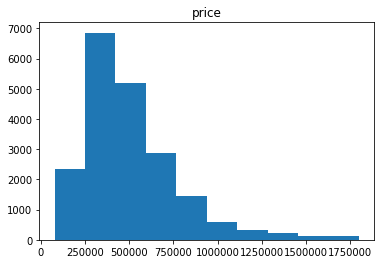

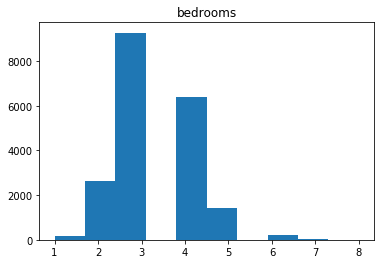

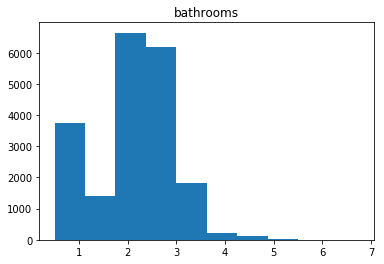

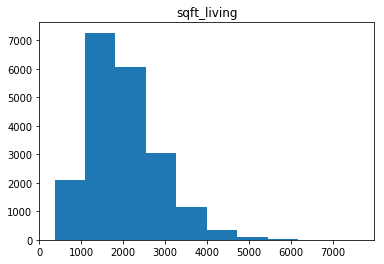

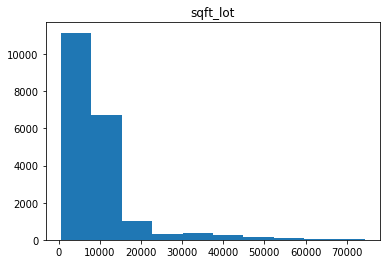

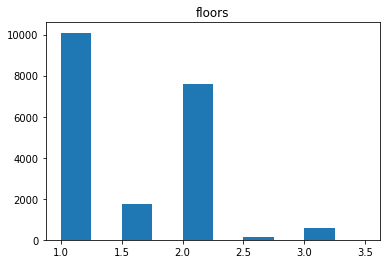

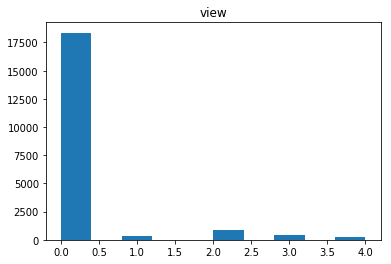

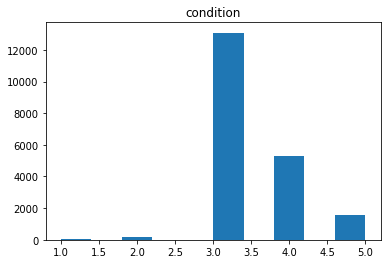

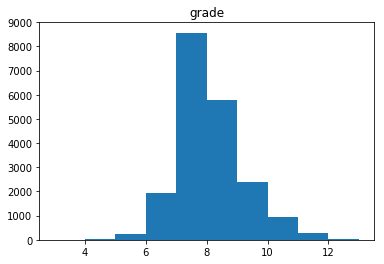

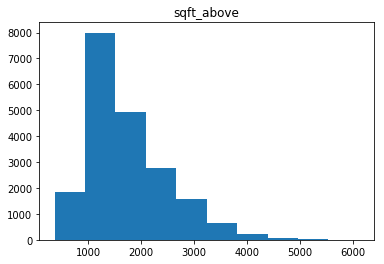

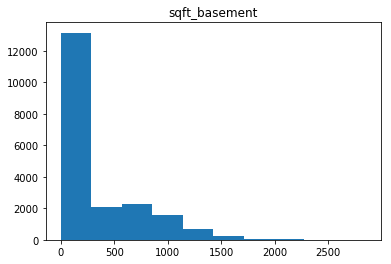

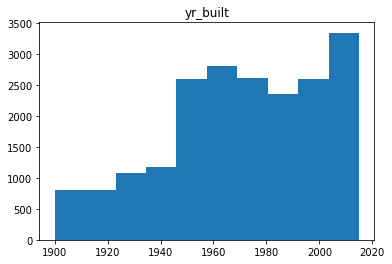

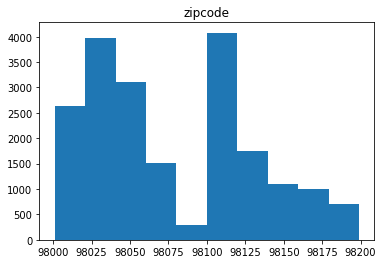

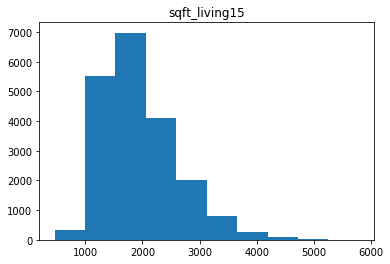

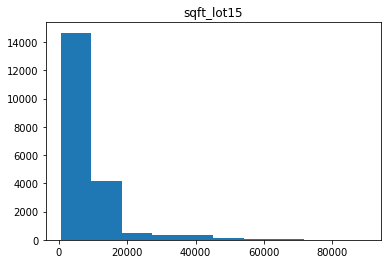

In [12]:
# Let's check what our data looks like using histograms before we normalize
hist_list = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15']
for column in hist_list:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

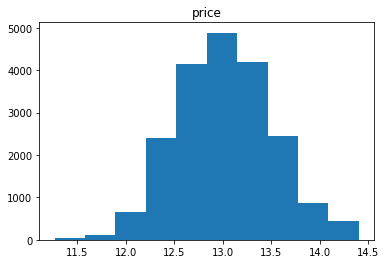

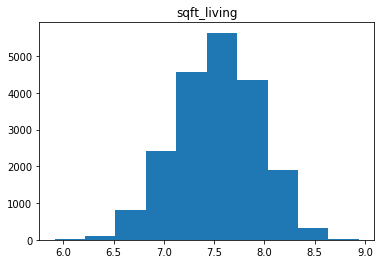

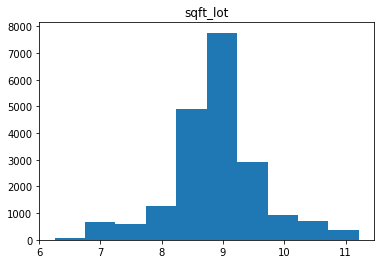

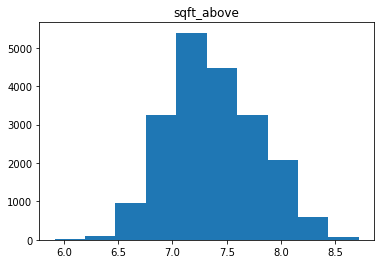

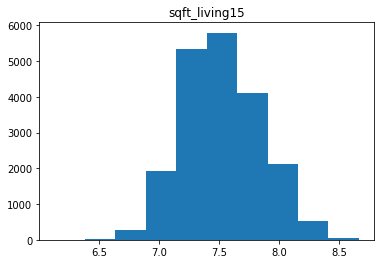

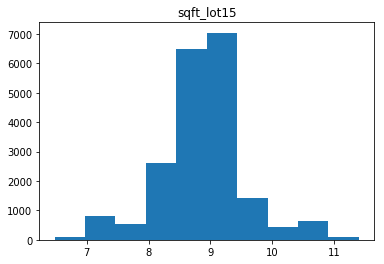

In [13]:
# We will log transform our continuous variables
log_list = ['price','sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']
for column in log_list:
    df[column] = np.log(df[column])

# Let's check our data using histograms again
for column in log_list:
    plt.hist(df[column])
    plt.title(column)
    plt.show()
    
# The continuous data has a much more normal distribution after normalizing

## Exploratory Data Analysis

C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


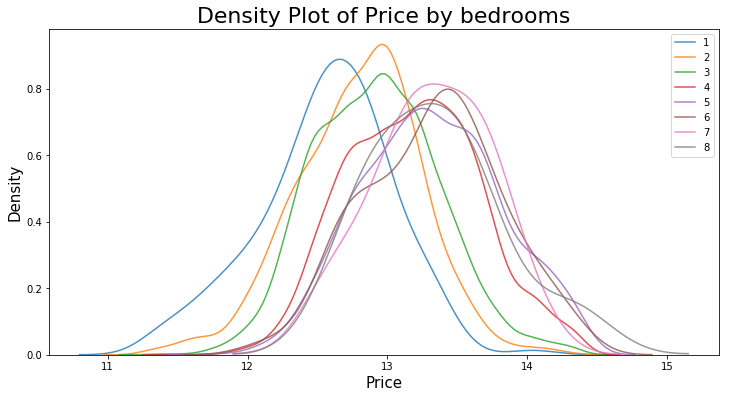

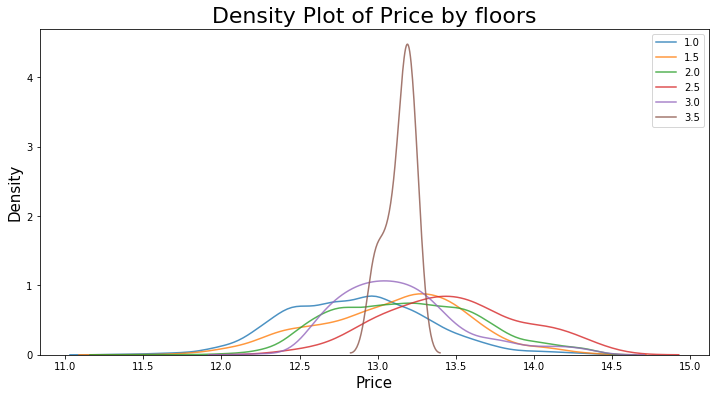

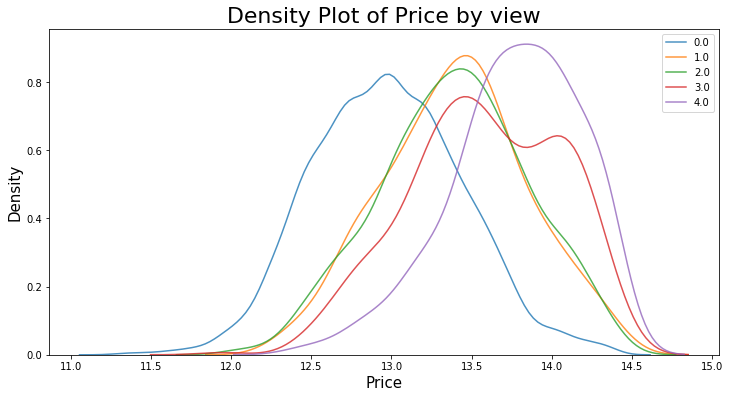

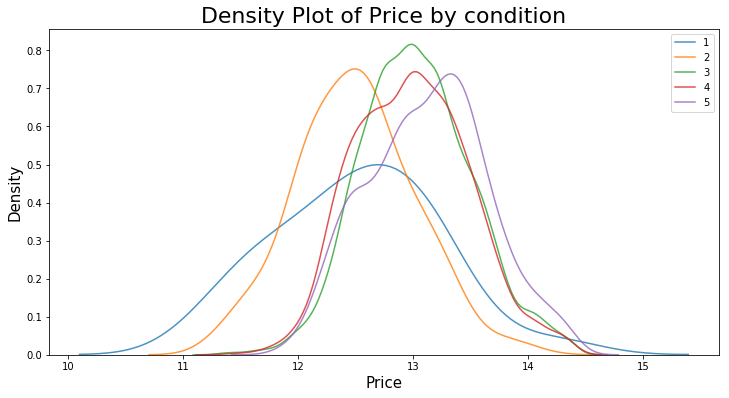

C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\rrubel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


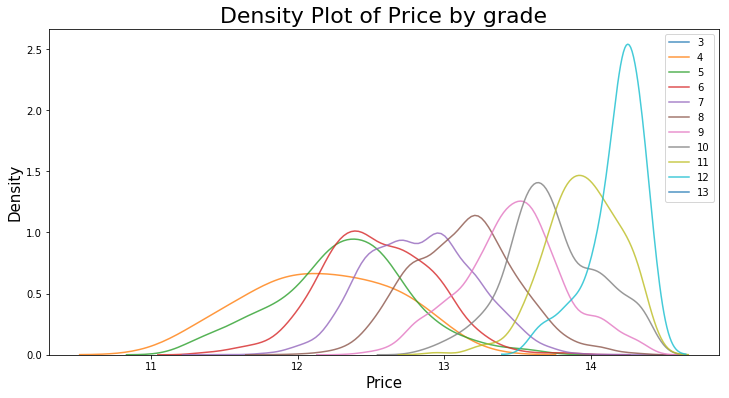

In [14]:
# Now that outliers are removed and the data is normalized, KDE plots will be used to see patterns in the data
factors = ['bedrooms', 'floors', 'view', 'condition', 'grade']

for factor in factors:
    types = df[factor].unique()
    types = sorted(types)
    plt.figure(figsize=(12,6))
    for column in types:
        subset = df[df[factor] == column]
        sns.kdeplot(subset['price'], label = column, shade = False, alpha = 0.8);
    
    plt.xlabel('Price', size = 15); plt.ylabel('Density', size = 15); 
    plt.title('Density Plot of Price by ' + factor, size = 22);
    plt.show()

In [15]:
print("As to be expected, the plots show a positive correlation between the number of bedrooms, quality of view, condition, and grade with the price of the house. The floors plot shows a large spike in density towards the median price for 3.5 floors. This plot does not show a strong positive or negative correlation with price. It may not be a good predictor for the model, but we will leave it in for now.")

As to be expected, the plots show a positive correlation between the number of bedrooms, quality of view, condition, and grade with the price of the house. The floors plot shows a large spike in density towards the median price for 3.5 floors. This plot does not show a strong positive or negative correlation with price. It may not be a good predictor for the model, but we will leave it in for now.


## Check for Multicollinearity

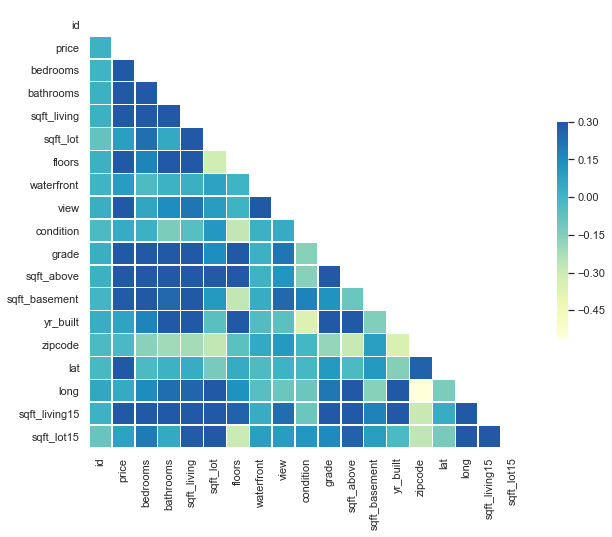

In [16]:
# Check multicollinearity between predictors using a seaborn heatmap 
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, mask=mask, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink' : 0.5}, cmap="YlGnBu")

In [17]:
print("The highest correlation between predictors is around 0.5 for longitude and zip code. The correlation between other predictors is small enough to not have to worry about collinearity in this model. We will not use longitude or latitude as predictors in this model. Their numbers represent geographical locations, but the model might mistake higher and lower values as being more important.")

The highest correlation between predictors is around 0.5 for longitude and zip code. The correlation between other predictors is small enough to not have to worry about collinearity in this model. We will not use longitude or latitude as predictors in this model. Their numbers represent geographical locations, but the model might mistake higher and lower values as being more important.


## Dealing with Categorical Columns

In [18]:
# Check the waterfront column
# Change the waterfront column to categorical with a NaN category because there are a lot of missing values
# Convert all categorical variables into dummy variables
df["waterfront"] = df["waterfront"].fillna("NaN")
df = pd.get_dummies(df, columns=["waterfront"], prefix = "water")
df = pd.get_dummies(df, columns=["bedrooms"], prefix = "bed")
df = pd.get_dummies(df, columns=["bathrooms"], prefix = "bath")
df = pd.get_dummies(df, columns=["floors"], prefix = "floors")
df = pd.get_dummies(df, columns=["view"], prefix = "view")
df = pd.get_dummies(df, columns=["condition"], prefix = "cond")
df = pd.get_dummies(df, columns=["grade"], prefix = "grade")
df = pd.get_dummies(df, columns=["zipcode"], prefix = "zip")

In [19]:
# Check r_squared and p-values of all continuous variables
df.columns = df.columns.str.replace("[.]", "_")
col_names = df.columns[:12].drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

['id', 0.000212949617226732, 13.007433670792366, 2.4998966553913156e-12, 0.03826982927825886]
['date', 0.023458917079513864, 12.691580461311407, 0.33859093370017757, 0.49614052502967976]
['sqft_living', 0.41375770126174427, 7.190807361161264, 0.7739932794374426, 0.0]
['sqft_lot', 0.007035900518543636, 12.522569623475185, 0.05584924749959508, 8.246726287694304e-33]
['sqft_above', 0.3001855162022675, 8.201109212312627, 0.65332961955862, 0.0]
['sqft_basement', 0.08302937854973091, 12.924677651224734, 0.0003339320716526359, 0.0]
['yr_built', 0.0049563923244047015, 10.6946789069789, 0.0011794784390883814, 1.4079061444648036e-23]
['lat', 0.2305100676397347, -68.49602090807397, 1.7138829514974263, 0.0]
['long', 0.0020982112113958618, 33.11101053710869, 0.1643932405176986, 7.674181335597407e-11]
['sqft_living15', 0.34220893052753654, 6.251668500322988, 0.8992591609938699, 0.0]
['sqft_lot15', 0.0058355284826238085, 12.526221116785658, 0.05551735861790885, 1.7565600791859214e-27]


In [20]:
# Add results to a dataframe to view
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,id,0.00021295,13.0074,2.4999e-12,0.0382698
2,date,0.0234589,12.6916,0.338591,0.496141
3,sqft_living,0.413758,7.19081,0.773993,0
4,sqft_lot,0.0070359,12.5226,0.0558492,8.24673e-33
5,sqft_above,0.300186,8.20111,0.65333,0
6,sqft_basement,0.0830294,12.9247,0.000333932,0
7,yr_built,0.00495639,10.6947,0.00117948,1.40791e-23
8,lat,0.23051,-68.496,1.71388,0
9,long,0.00209821,33.111,0.164393,7.67418e-11


In [21]:
print("With a p-value of 0.5, the date column will be removed from the model.")

With a p-value of 0.5, the date column will be removed from the model.


In [22]:
# Check r_squared and p-values of all categorical variables
cols_water = df.columns[12:15]
cols_bed = df.columns[15:23]
cols_bath = df.columns[23:48]
cols_floor = df.columns[48:54]
cols_view = df.columns[54:59]
cols_cond = df.columns[59:64]
cols_grade = df.columns[64:75]
cols_zip = df.columns[75:145]

cols = [cols_water, cols_bed , cols_bath, cols_floor, cols_view, cols_cond, cols_grade, cols_zip]
for col in cols:
    print( 
    )
    print(col[0])
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df).fit()
    print(model.summary())


water_0_0
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                      -0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    -41.56
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               1.00
Time:                        22:04:44   Log-Likelihood:                -14384.
No. Observations:               20160   AIC:                         2.878e+04
Df Residuals:                   20156   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.788e+10   3.62e+11      0.2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     353.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:04:45   Log-Likelihood:                -6311.2
No. Observations:               20160   AIC:                         1.276e+04
Df Residuals:                   20090   BIC:                         1.332e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8377      0.003   4486.800      0.0

In [23]:
print("The waterfront, bedroom, bathroom, view, condition, grade, and a few of the zip code columns have p-values a lot higher than 0.05. For this reason, these columns will be removed from the final model.")

The waterfront, bedroom, bathroom, view, condition, grade, and a few of the zip code columns have p-values a lot higher than 0.05. For this reason, these columns will be removed from the final model.


In [24]:
# Create final dataframe with predictors to be used for the model
df_final = df.drop(df.columns[12:75], axis=1, inplace=True)
df_final = df.drop(["id","date","long","lat","zip_98024", "zip_98014", "zip_98045", "zip_98056", "zip_98118", "zip_98133", "zip_98155"], axis=1)

In [25]:
df_final.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zip_98001,zip_98002,...,zip_98144,zip_98146,zip_98148,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,12.309982,7.073270,8.639411,7.073270,0.0,1955,7.200425,8.639411,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.195614,7.851661,8.887653,7.682482,400.0,1951,7.432484,8.941022,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.100712,6.646391,9.210340,6.646391,0.0,1933,7.908387,8.994917,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,8.517193,6.956545,910.0,1965,7.215240,8.517193,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,8.997147,7.426549,0.0,1987,7.495542,8.923058,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Ranking

In [26]:
# Check mean squared errors for models using different number of features for each
y = df_final[["price"]]
X = df_final.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)
linreg = LinearRegression()

MSE_test = []
MSE_train = []
list_n = list(range(5,75,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print("number of features: " + str(n))
    print(mse_train)
    print(mse_test)
    print("-----------------")
MSE_test.append(mse_test)
MSE_train.append(mse_train)

number of features: 5
price    0.127846
dtype: float64
price    0.13013
dtype: float64
-----------------
number of features: 15
price    0.093061
dtype: float64
price    0.09637
dtype: float64
-----------------
number of features: 25
price    0.068356
dtype: float64
price    0.070582
dtype: float64
-----------------
number of features: 35
price    0.050837
dtype: float64
price    0.050832
dtype: float64
-----------------
number of features: 45
price    0.044539
dtype: float64
price    0.044905
dtype: float64
-----------------
number of features: 55
price    0.040709
dtype: float64
price    0.041437
dtype: float64
-----------------
number of features: 65
price    0.039032
dtype: float64
price    0.039936
dtype: float64
-----------------


In [27]:
print("The MSE for both the train and test sets continually go down as more features are added. For this reason, the max number of features will be used to create the model. This means all 70 columns of the final dataframe will have a coefficent in the final model.")

The MSE for both the train and test sets continually go down as more features are added. For this reason, the max number of features will be used to create the model. This means all 70 columns of the final dataframe will have a coefficent in the final model.


## Cross Validation

In [28]:
# Cross Validate the data using the k-fold method
y = df_final[["price"]]
X = df_final.drop(["price"], axis=1)

cv_10_results = cross_val_score(linreg, X, y, cv=10)
print(cv_10_results)
print()
print(np.mean(cv_10_results))

[0.83291614 0.82937498 0.83149405 0.83656143 0.8321237  0.83601461
 0.84595546 0.83433301 0.83640314 0.84624812]

0.8361424645040965


## Final Model

In [29]:
# Print final model coefficeints and intercept
linreg.fit(X, y)
print(linreg.coef_)
print(linreg.intercept_)

[[ 2.53907170e-01  3.95193031e-02  3.00964525e-01  8.75341614e-05
  -6.21084251e-05  2.73669284e-01  2.39097575e-03 -4.50384502e-01
  -4.44625636e-01 -3.98143597e-01  6.85212397e-01  3.26812602e-01
   2.76476687e-01  2.39772727e-01  2.52672869e-01 -2.01868026e-01
  -6.66405040e-03 -1.61151510e-01 -3.82081364e-01 -4.51578764e-01
   1.13411296e-01 -2.81194597e-02  2.01665541e-01 -4.06906406e-01
  -3.74734424e-01 -4.43169153e-01  3.79149561e-01  1.11914514e-01
  -3.07595634e-01  8.44652574e-01  5.15609353e-01 -3.83553408e-01
   2.16464802e-01  1.63323090e-01 -3.00318113e-01 -2.75877967e-01
  -1.08643732e-01 -5.46030483e-02  7.34706144e-02  4.52787095e-02
   1.53862496e-01  1.70425250e-01  3.78331444e-02 -4.31815867e-01
   6.23858934e-01  4.74499801e-01  5.80377580e-01 -2.76823882e-02
   5.01227659e-01 -3.68931045e-02  6.49895955e-01  6.57084395e-01
   4.38536290e-01  4.38274066e-01  4.57681494e-01  6.47024444e-01
   4.66240786e-01  1.66116828e-01  2.11541165e-01  3.52103642e-01
   3.10007

In [30]:
print("The final model includes 70 coefficents, a large part of which is dummy variables. The model uses the square feet of the lot, above ground, and the basement, the year the house was built, and zip code of the property to predict the price. The cross-validation of score is 0.84. The MSE of the test and train set using all 77 features is 0.039 and 0.04 respectively. The mean squared error for both the test and train datasets are low. The MSE is slightly higher for the test dataset, meaning or model is very slightly overfitted. The cross-validation score shows our final model is 84% accurate.")

The final model includes 70 coefficents, a large part of which is dummy variables. The model uses the square feet of the lot, above ground, and the basement, the year the house was built, and zip code of the property to predict the price. The cross-validation of score is 0.84. The MSE of the test and train set using all 77 features is 0.039 and 0.04 respectively. The mean squared error for both the test and train datasets are low. The MSE is slightly higher for the test dataset, meaning or model is very slightly overfitted. The cross-validation score shows our final model is 84% accurate.


In [31]:
print("The living room square feet coefficient is 0.254, which means that with all other predictors held constant, a one unit change in price causes a 0.254 change in square feet of the living room. This positive correlation makes sense. The more a house cost, the larger the living room will be.")
print("The zip_98199 coefficient is 0.518, which means that will all other predictors held constant, a one unit change in price causes a 0.518 change in value for this zip code. The positive correlation shows that this zip code must have a higher than average mean in housing prices.")
print("The zip_98001 coefficient is -0.45, which means that will all other predictors held constant, a one unit change in price causes a -0.45 change in value for this zip code. The negative correlation shows that this zip code must have a lower than average mean in housing prices.")

The living room square feet coefficient is 0.254, which means that with all other predictors held constant, a one unit change in price causes a 0.254 change in square feet of the living room. This positive correlation makes sense. The more a house cost, the larger the living room will be.
The zip_98199 coefficient is 0.518, which means that will all other predictors held constant, a one unit change in price causes a 0.518 change in value for this zip code. The positive correlation shows that this zip code must have a higher than average mean in housing prices.
The zip_98001 coefficient is -0.45, which means that will all other predictors held constant, a one unit change in price causes a -0.45 change in value for this zip code. The negative correlation shows that this zip code must have a lower than average mean in housing prices.


## Business Decisions